In [2]:
!pip install tensorflow

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for jax: filename=jax-0.4.12-py3-none-any.whl size=1498562 sha256=cbf0df7b99f70377523c84146c4b790e28f1812b4b3e64265260d4556ea947e3
  Stored in directory: c:\users\andri\appdata\local\pip\cache\wheels\cd\5a\a8\88d7a5c8d35f5a5e9cddec186ce76d5e303e0462d8a6c827bb
Successfully built jax
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0


In [5]:
!pip install tensorflow_hub

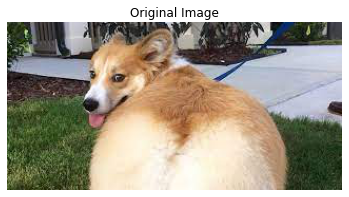

1/1 [==============================] - 1s 672ms/step
Predicted class: Dog


In [21]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import tensorflow_hub as hub

model = tf.keras.models.load_model(
    'model_14class_v2.h5',
    custom_objects={'KerasLayer': hub.KerasLayer}
)

image_path = 'corgitest2.jpeg'


def preprocess_image(image_path):
    # Load the image using PIL
    image = Image.open(image_path)

    # Display the original image
    plt.imshow(image)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

    # Resize the image to the required input shape of the model
    resized_image = image.resize((224, 224))

    # Convert the image to a NumPy array
    array_image = np.array(resized_image)

    # Normalize pixel values to the range [0, 1]
    normalized_image = array_image / 255.0

    # Add an extra dimension for the batch size
    normalized_image = np.expand_dims(normalized_image, axis=0)

    # Return the preprocessed image
    return normalized_image


preprocessed_image = preprocess_image(image_path)

predictions = model.predict(preprocessed_image)
predicted_index = np.argmax(predictions)
class_labels = ['Arctic Fox',
                'Butterfly',
                'Cat',
                'Cheetah',
                'Chicken',
                'Chimpanzee',
                'Cow', 
                'Dog',
                'Elephant',
                'Hamster',
                'Horse',
                'Sheep',
                'Spider',
                'Squirrel']

predicted_class = class_labels[predicted_index]

print("Predicted class:", predicted_class)
